In [1]:
from pycalphad.tests.datasets import *
from pycalphad.core.solver import InteriorPointSolver
from pycalphad import equilibrium, Database, variables as v

ALFE_DBF = Database(ALFE_TDB)
ISSUE43_DBF = Database('issue43.tdb')

class ProblemSaver(InteriorPointSolver):
    saved_problem = [None]
    def solve(self, prob):
        self.saved_problem[0] = prob
        self.verbose = True
        return super(ProblemSaver, self).solve(prob)

#ISSUE43_DBF._parameters.purge_tables()

#eq = equilibrium(ALFE_DBF, ['AL', 'FE', 'VA'], ['FCC_A1', 'AL13FE4'],
#                 {v.MU('FE'): -123110, v.T: 300, v.P: 1e5}, solver=ProblemSaver())
eq = equilibrium(ISSUE43_DBF, ['AL', 'CR', 'NI', 'VA'], ['FCC_A1', 'GAMMA_PRIME'],
                     {v.MU('AL'): -119330.66377529, v.X('CR'): 1e-6, v.T: 1273, v.P: 101325},
                     solver=ProblemSaver(), global_min=False, verbose=True,
                 user_starting_point=[('FCC_A1', [1, 1e5, 1273, 4.10199831e-01, 1.08835854e-12, 5.89800169e-01, 1.00000000e+00]),
                                      ('GAMMA_PRIME', [1, 1e5, 1273, 1.36316508e-01, 7.62260190e-13, 8.63683492e-01, 9.99950107e-01, 5.77654607e-14
, 4.98930987e-05])])

Components: AL CR NI VA
Phases: FCC_A1 
GAMMA_PRIME 
[done]
Trying to improve poor solution
Chemical Potentials [-119316.18810576 -173539.60846531  -97698.11468223]
[9.99999990e-12 9.86923267e-17 7.85545954e-15 2.43783854e-11
 9.90099039e-06 1.69549120e-11 9.99999990e-12 6.87883307e-11
 7.31602128e-06 1.17010361e-11 1.00226507e-11 1.71143229e-04
 4.42492477e-09 1.00000198e-11 1.14922783e+03]
[1.00000000e+00 1.01325000e+05 1.27300000e+03 4.10199429e-01
 9.99999957e-07 5.89799571e-01 1.00000000e+00 1.45373503e-01
 1.37390234e-06 8.54625123e-01 9.97740013e-01 5.22320346e-08
 2.25993517e-03 9.99999010e-01 1.00000000e-06]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
('Exceeded zero seen:', CompositionSet(GAMMA_PRIME, [3.58465131e-01 1.04348476e-06 6.41533826e-01], NP=1e-06, GM=-105432.10285331725))
Removing CompositionSet(GAMMA_PRIME, [3.58465131e-01 1.04348476e-06 6.41533826e-01], NP=nan, GM=

In [2]:
eq.X

<xarray.DataArray 'X' (MU_AL: 1, N: 1, P: 1, T: 1, X_CR: 1, vertex: 4, component: 3)>
array([[[[[[[4.101994e-01, 1.000000e-06, 5.897996e-01],
            [         nan,          nan,          nan],
            [         nan,          nan,          nan],
            [         nan,          nan,          nan]]]]]]])
Coordinates:
  * MU_AL      (MU_AL) float64 -1.193e+05
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1.273e+03
  * X_CR       (X_CR) float64 1e-06
  * vertex     (vertex) int64 0 1 2 3
  * component  (component) <U2 'AL' 'CR' 'NI'

In [3]:
eq2 = equilibrium(ISSUE43_DBF, ['AL', 'CR', 'NI', 'VA'], ['FCC_A1', 'GAMMA_PRIME'],
                     {v.X('AL'): 0.4, v.X('CR'): 1e-12, v.T: 1273, v.P: 101325},  global_min=True, verbose=True)

Components: AL CR NI VA
Phases: FCC_A1 
GAMMA_PRIME 
[done]
('Redundant phase:', CompositionSet(FCC_A1, [0.40789234 0.02763506 0.5644726 ], NP=1e-06, GM=-105912.84458386466))
Removing CompositionSet(FCC_A1, [0.40789234 0.02763506 0.5644726 ], NP=nan, GM=-105912.84458386466)
Trying to improve poor solution
Chemical Potentials [-119330.59700121 -238635.00392927  -97714.20954901]
[9.99999990e-12 9.86923267e-17 7.85545954e-15 2.43783462e-11
 8.23978826e-04 1.69549023e-11 9.99999990e-12 7.33586867e-11
 2.69840282e+04 1.15783151e-11 1.00004988e-11 1.01978832e+04
 2.00362255e-07 1.21350366e-11 5.68382445e-11]
[1.00000000e+00 1.01325000e+05 1.27300000e+03 4.10200089e-01
 2.13623518e-09 5.89799909e-01 1.00000000e+00 1.36316498e-01
 1.00000000e-15 8.63683512e-01 9.99950111e-01 1.00000000e-15
 4.98994544e-05 8.24061134e-01 1.75938866e-01]
Status: 0 b'Algorithm terminated successfully at a locally optimal point, satisfying the convergence tolerances (can be specified by options).'
('Composition Se

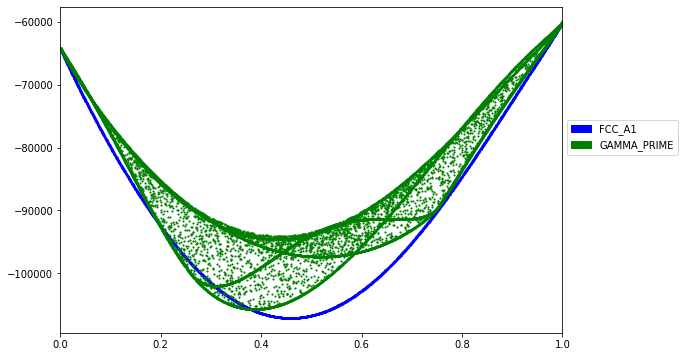

In [4]:
from pycalphad import calculate
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
import numpy as np

my_phases =  ['FCC_A1', 'GAMMA_PRIME']
legend_handles, colorlist = phase_legend(my_phases)

fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for name in my_phases:
    result = calculate(ISSUE43_DBF, ['AL', 'NI', 'VA'], name, P=101325, T=1273, output='GM')
    ax.scatter(result.X.sel(component='AL'), result.GM,
               marker='.', s=5, color=colorlist[name.upper()])
ax.set_xlim((0, 1))
ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
plt.show()

In [5]:
np.array(ProblemSaver.saved_problem[0].cl)

array([ 1.00000000e+00,  1.01325000e+05,  1.27300000e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+06,
        1.00000000e+00, -1.19330664e+05, -1.19330664e+05])